<a href="https://colab.research.google.com/github/Pankaj-sk/Crypto_Influencer_Analysis/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach 2



In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import nltk
nltk.download("stopwords")
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()



import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 1.7 MB 15.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 36.2 MB/s 
     |████████████████████████████████| 15.7 MB 23.7 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=95c596dc5566b65b5a462f9770a06b89f27620fa7b95eefc8fa3d82c26a23ec0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling panda

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
#preparing the data
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [ ]:
#importing stopwords
stopwords = stopwords.words("english")

In [ ]:
#checking stopwords
print (stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#imorting the data
import pandas as pd
data = pd.read_excel("/Base_Data.xlsx")


FileNotFoundError: ignored

In [ ]:
data = data["tweets"].values.tolist()

In [ ]:
#lemmatization the text to core root words
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])

would much rather see community come appreciate virtue pos


In [ ]:
#converting into individual words
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['would', 'much', 'rather', 'see', 'community', 'come', 'appreciate', 'virtue', 'pos']


In [ ]:
#creating a bag of words
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
appreciate


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
#visualising the data

pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
#pyLDAvis.sklearn.prepare(lda_model, dtm_tf, tf_vectorizer)

dir(lda_model)

#vis = gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
#vis

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_apply',
 '_load_specials',
 '_save_specials',
 '_smart_save',
 'alpha',
 'bound',
 'callbacks',
 'chunksize',
 'clear',
 'decay',
 'diff',
 'dispatcher',
 'distributed',
 'do_estep',
 'do_mstep',
 'dtype',
 'eta',
 'eval_every',
 'expElogbeta',
 'gamma_threshold',
 'get_document_topics',
 'get_term_topics',
 'get_topic_terms',
 'get_topics',
 'id2word',
 'inference',
 'init_dir_prior',
 'iterations',
 'load',
 'log_perplexity',
 'minimum_phi_value',
 'minimum_probability',
 'num_terms',
 'num_topics',
 'num_updates',
 'numworkers',
 'offset',
 'optimize_alpha',
 'optimize_eta',
 'pas

In [ ]:
lda_model.show_topics()

NameError: ignored

# Approach 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import nltk
#nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

In [ ]:
tweets_data = pd.read_excel('Base_Data_Working_File.xlsx')
tweets_data.columns

Index(['Topic_Coin', 'screenname', 'name', 'tweettext', 'likes', 'time',
       'Date', 'Date+1', 'Date+3', 'Date+7',
       ...
       'M_BNB.30.Open', 'M_BNB.30.High', 'M_BNB.30.Low', 'M_BNB.30.Close',
       'M_BNB.30.VoluM_BNB.e', 'M_BNB.30.M_BNB.arket cap', 'M_BNB.30.Profit',
       'M_BNB.30.Percentage Change', 'M_BNB.30.Risk', 'M_BNB.30.Span_Price'],
      dtype='object', length=197)

In [ ]:
#Preparing the Data
#The first step is to convert the text to lowercase so that 
#all words with similar spelling are treated the same. Look at an entry in the data.
tweets_data['tweettext'][2]

'also important antiinfluences like seeing toxic btc maximalism becoming even back wanting build culture thats far away like'

In [ ]:
tweets_data['tweettext'] = tweets_data['tweettext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
#confirm that only lowercase values are present in the data
tweets_data['tweettext'][2]
tweets_data['tweettext'][5]

'new podcast episode vitalik buterin creator ethereum understanding ethereum eth vs btc'

In [ ]:
#The next step is to remove the numerical values and punctuation from the words. 
#This process is performed using regular expressions. 
#First, remove the numerical values.
patterndigits = '\\b[0-9]+\\b'
tweets_data['tweettext'] = tweets_data['tweettext'].str.replace(patterndigits,'')

In [ ]:
#remove the punctuation
patternpunc = '[^\w\s]'
tweets_data['tweettext'] = tweets_data['tweettext'].str.replace(patternpunc,'')

In [ ]:
#confirm that the changes occurred
tweets_data['tweettext'][2]
tweets_data['tweettext'][5]

'new podcast episode vitalik buterin creator ethereum understanding ethereum eth vs btc'

In [ ]:
#Remove stop words from the data by using the library nltk. 
#Obviously, we will choose english because the Tweets are in English
stop = stopwords.words('english')

tweets_data['tweettext'] = tweets_data['tweettext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
#Remove the Twitter account names of each crypto from the data. 
airline_names = ['bitcoin','binance','ethereum','btc', 'eth', 'bnb']

tweets_data['tweettext'] = tweets_data['tweettext'].apply(lambda x: " ".join(x for x in x.split() if x not in airline_names)) 

In [ ]:
#confirm the changes
tweets_data['tweettext'][2]
tweets_data['tweettext'][5]

'new podcast episode vitalik buterin creator understanding vs'

In [ ]:
#The next step is to stem the words. 
#nltk provides an easy-to-use function, PorterStemmer(), to help.
porstem = PorterStemmer()

tweets_data['tweettext'] = tweets_data['tweettext'].apply(lambda x: " ".join([porstem.stem(word) for word in x.split()]))

In [ ]:
#confirm the changes
tweets_data['tweettext'][2]
tweets_data['tweettext'][5]

'new podcast episod vitalik buterin creator understand vs'

In [ ]:
#last step is creating a document-term matrix. We use a vectorizer from scikitlearn.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

tokens_data = pd.DataFrame(vectorizer.fit_transform(tweets_data['tweettext']).toarray(), columns=vectorizer.get_feature_names())

In [ ]:
#This contains a lot of columns. So much so that the majority of them are truncated and not displayed.
#To overcome this, you can use the following code.
print(tokens_data.columns.tolist())

['000', '0007btc', '000m', '000th', '04am', '0s', '0x303ccc9f560244da4f575aa6288a80ab3fc81879', '1000btc', '1000x', '100bn', '100k', '100m', '100mil', '100x', '10ampst', '10b', '10k', '10m', '10milbtc', '10min', '10th', '10tr', '10x', '10xing', '10yeae', '10year', '10yearsltc', '11th', '120k', '12k', '12m', '12th', '130k', '130m', '130x', '13k', '13th', '140k', '144k', '14k', '150bn', '150m', '15k', '15th', '16k', '17th', '190k', '1950', '19k', '1b', '1bil', '1btc', '1d', '1d3d', '1hr', '1inch', '1k', '1m', '1mb', '1mil', '1million', '1min', '1oy', '1pm', '1s', '1st', '1t', '1x', '20', '2000', '200ema', '200k', '200m', '200x', '2020', '20c', '20k', '20x', '213k', '21m', '21share', '21st', '23rd', '24h', '24hr', '250k', '258k', '25b', '25k', '25million', '25th', '26th', '286mm', '28th', '2d', '2hr', '2k', '2m', '2mb', '2nd', '2x', '30', '3000', '30k', '30m', '30min', '30th', '320k', '32k', '33k', '35m', '36mo', '374mm', '38k', '390m', '3d', '3hour', '3k', '3pm', '3rd', '3t', '3x', '4000

In [ ]:
#top 10 terms in the TDM
sort_text = tokens_data.sum()

In [ ]:
#Top 10 terms in the tweets data
sort_text.sort_values(ascending = False).head(10)

someth    307
like      293
peopl     263
use       262
crypto    235
new       234
time      234
get       230
year      225
amp       222
dtype: int64

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

8
6


In [ ]:
#resizing the default values of plots
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

<AxesSubplot:>

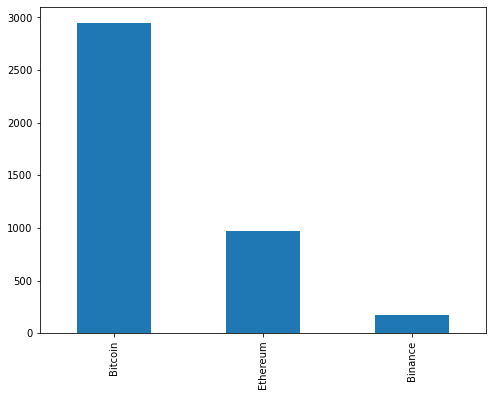

In [ ]:
#create the plot
tweets_data.Topic_Coin.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sentiment'>

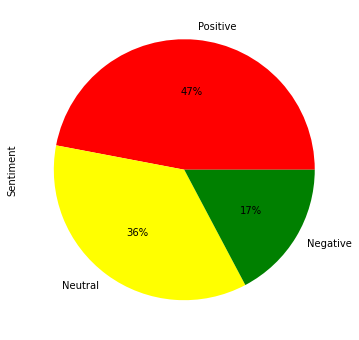

In [ ]:
#analysing sentiments
tweets_data.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<AxesSubplot:xlabel='Topic_Coin'>

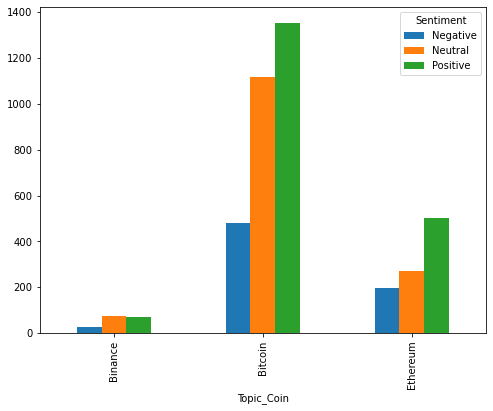

In [ ]:
#distribution of sentiment by the crypto currency
airline_sentiment = tweets_data.groupby(['Topic_Coin', 'Sentiment']).Sentiment.count().unstack()

airline_sentiment.plot(kind='bar')

In [ ]:
#In setting up the TF-IDF, we use only the 2,500 most frequently occurring terms, 
#only those terms that occur in a maximum of 80% of the documents
features = tweets_data['tweettext']

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stop)

processed_features = vectorizer.fit_transform(features).toarray()

In [ ]:
#pass in the transformed vector processed_features and apply 
#the variable labels to that vector as "labels" for each value.
labels = tweets_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
#train a machine learning model using random forest; though, you can use a different machine learning approach
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
#generate the testing model
predictions = text_classifier.predict(X_test)

In [ ]:
#evaluate the model
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 63  31  32]
 [  5 261  28]
 [  5  56 338]]


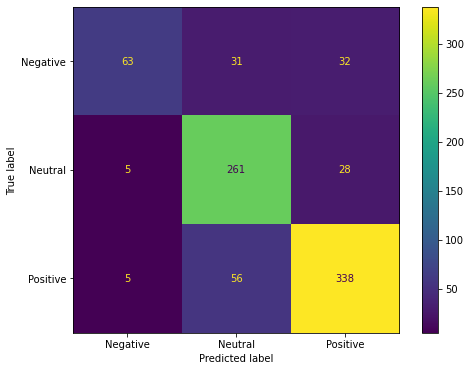

In [ ]:
#confusion matrix with heat map
plot_confusion_matrix(text_classifier, X_test, y_test)

In [ ]:
#more analysis for the classification. This is a classification report.
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.86      0.50      0.63       126
     Neutral       0.75      0.89      0.81       294
    Positive       0.85      0.85      0.85       399

    accuracy                           0.81       819
   macro avg       0.82      0.74      0.76       819
weighted avg       0.82      0.81      0.80       819



In [ ]:
#Another important assessment is found on the row labeled accuracy
print(accuracy_score(y_test, predictions))

0.8083028083028083


In [ ]:
#Topic Modeling
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [ ]:
#transform vector into a document-term matrix
doc_term_matrix = vectorizer.fit_transform(tweets_data['tweettext'].values.astype('U'))

In [ ]:
#confirm how many documents and terms are in the data
doc_term_matrix.shape

(4093, 2051)

In [ ]:
#generate the LDA with 5 topics in the argument n_components
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=35)

In [ ]:
#Retrieve words in the first topic, sort the indexes according to probability values using argsort(), 
#and output the results to the console.
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(vectorizer.get_feature_names()[i])

time
transact
activ
address
futur
use
good
market
block
node


In [ ]:
#Top 10 words for each topic
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['time', 'transact', 'activ', 'address', 'futur', 'use', 'good', 'market', 'block', 'node']


Top 10 words for topic #1:
['crypto', 'salvador', 'el', 'use', 'new', 'someth', 'buy', 'look', 'dont', 'like']


Top 10 words for topic #2:
['fee', 'like', 'think', 'price', 'crypto', 'litecoin', 'etf', 'year', 'peopl', 'make']


Top 10 words for topic #3:
['im', 'amp', 'thank', 'crypto', 'question', 'bitcoin', 'learn', 'work', 'new', 'someth']


Top 10 words for topic #4:
['year', 'think', 'world', 'someth', 'fiat', 'time', 'use', 'money', 'amp', 'cash']




In [ ]:
#create a new column within the data frame.  Create a new object called topic_values
#This new variable topic_values has only 5 "terms" because those are the 5 topics we just generated
topic_values = LDA.transform(doc_term_matrix)

topic_values.shape

tweets_data['topic'] = topic_values.argmax(axis=1)


In [ ]:
#see that the new column is added back into the data frame
#tweets_data.head()

In [ ]:
#Non-Negative Matrix Factorization
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

doc_term_matrix2 = tfidf_vect.fit_transform(tweets_data['tweettext'].values.astype('U'))

In [ ]:
#Use the function fit() to generate the results
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix2)

/Users/akanshamehta/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=5, random_state=42)

In [ ]:
#Similar to LDA, We pull the list of words for the first topic.
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

crypto
make
high
money
market
price
bitcoin
new
year
time


In [ ]:
#top 10 words of each topic to display on the screen
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['crypto', 'make', 'high', 'money', 'market', 'price', 'bitcoin', 'new', 'year', 'time']


Top 10 words for topic #1:
['feel', 'thing', 'buy', 'peopl', 'know', 'think', 'look', 'dont', 'like', 'someth']


Top 10 words for topic #2:
['want', 'transact', 'work', 'peer', 'crypto', 'world', 'fee', 'bitcoincash', 'use', 'cash']


Top 10 words for topic #3:
['brief', 'discuss', 'live', 'keiser', 'max', 'volcano', 'bond', 'salvador', 'el', 'amp']


Top 10 words for topic #4:
['trade', 'gbtc', 'file', 'grayscal', 'sec', 'break', 'spot', 'buy', 'futur', 'etf']




In [ ]:
#Adding data to data table
topic_values2 = nmf.transform(doc_term_matrix2)
tweets_data['topic2'] = topic_values2.argmax(axis=1)
tweets_data.head()

,Topic_Coin,screenname,name,tweettext,likes,time,Date,Date+1,Date+3,Date+7,...,M_BNB.30.Low,M_BNB.30.Close,M_BNB.30.VoluM_BNB.e,M_BNB.30.M_BNB.arket cap,M_BNB.30.Profit,M_BNB.30.Percentage Change,M_BNB.30.Risk,M_BNB.30.Span_Price,topic,topic2
0,Bitcoin,VitalikButerin,vitalik.eth,would much rather see commun come appreci virt...,187,2021-09-02 13:15:00,2021-09-02,2021-09-03,2021-09-05,2021-09-09,...,411.04,428.10,1.740937e+09,7.197918e+10,NaN,NaN,NaN,NaN,4,0
1,Bitcoin,VitalikButerin,vitalik.eth,answer book vs music differ back read standard...,42,2021-09-02 12:39:00,2021-09-02,2021-09-03,2021-09-05,2021-09-09,...,411.04,428.10,1.740937e+09,7.197918e+10,NaN,NaN,NaN,NaN,3,0
2,Bitcoin,VitalikButerin,vitalik.eth,also import antiinflu like see toxic maxim bec...,57,2021-09-02 12:08:00,2021-09-02,2021-09-03,2021-09-05,2021-09-09,...,411.04,428.10,1.740937e+09,7.197918e+10,NaN,NaN,NaN,NaN,4,1
3,Bitcoin,VitalikButerin,vitalik.eth,latter im think stablecoin peopl think stablec...,989,2021-09-01 22:42:00,2021-09-01,2021-09-02,2021-09-04,2021-09-08,...,382.13,421.64,2.162493e+09,7.089383e+10,NaN,NaN,NaN,NaN,4,1
4,Bitcoin,VitalikButerin,vitalik.eth,feel like ive less monetari theori per se year...,764,2021-09-01 22:37:00,2021-09-01,2021-09-02,2021-09-04,2021-09-08,...,382.13,421.64,2.162493e+09,7.089383e+10,NaN,NaN,NaN,NaN,4,0
